Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_matrixmul.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

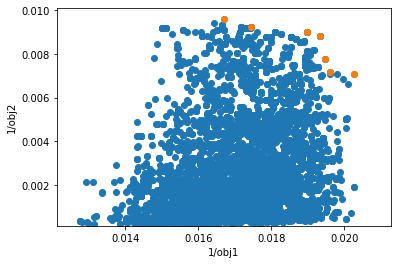

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.002560076368379791


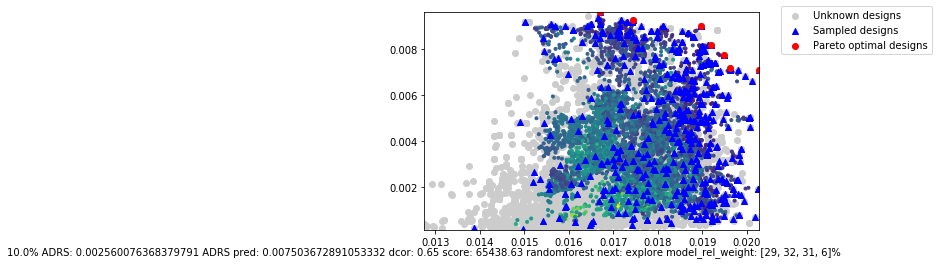

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1984, 2112, 2016, 2621, 1992, 1988,   12,   13, 5796, 5088, 5139,
       1531, 4522,    1,    2, 1331,    3, 5641, 4640, 1579, 3197,    8,
       5800, 1519, 4813, 1598, 1852, 4940, 1268, 4775, 1333, 1399, 1492,
       1271, 1522, 4805, 1398,  259, 1396, 1270, 1538, 1509, 1335, 1569,
       5048, 2913, 1431,  307, 3146, 1403, 3009, 2977, 2849, 1334, 2976,
       1566, 1567, 4760,  275, 3008,  252, 4643, 2912, 2029, 2993, 3039,
       4583, 1332, 4468, 3037, 1460, 1520, 4525, 1269, 1534,  385, 1464,
        835, 1283, 3929, 4304, 1402,  847, 1786, 4540,  255, 1021, 2350,
       3051, 3114, 1087, 1550, 3318, 1467, 1383, 2981, 5659, 4480, 5234,
       1461, 1161, 1258, 1242,  863,   67, 3106,  131,  195,  515,  519,
       1774,  531,  451,  579, 2094, 2414, 2418, 2729, 1177, 1397, 2430,
        843, 1149, 2030,  771,  770, 1148, 1086,  450,  130, 2846,  707,
       1153, 2349, 3624, 3561,  706,  774,  454, 3628, 5749,  779, 2911,
       3937, 1473, 4523,  134, 3036, 1409, 1165,  5